# 데이터 시각화
## 아래 세가지 모델의 confusion matrix를 구해 새로운 intuition 얻기

### 1.1 단어의 빈도수를 활용한 Logistic regression
### 1.2 TF-IDF 를 활용한 Logistic regression
### 1.3 BERT classification 

In [129]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [130]:
text_df=pd.read_csv('clean_texts.csv')
texts=list(text_df['text'])

# 1.1 단어의 빈도수를 활용한 Logistic regression

In [131]:
# 단어 빈도수 세기 
counter=CountVectorizer()
train_data_features = counter.fit_transform(texts)


{'when': 17623, 'you': 17965, 'see': 14164, 'the': 16073, 'word': 17804, 'amazon': 537, 'whats': 17615, 'first': 6139, 'thing': 16122, 'that': 16064, 'springs': 15106, 'to': 16276, 'mind': 10088, 'worlds': 17836, 'biggest': 1597, 'forest': 6329, 'longest': 9368, 'river': 13619, 'or': 11199, 'largest': 8930, 'internet': 8232, 'retailer': 13465, 'and': 615, 'which': 17630, 'do': 4663, 'consider': 3328, 'most': 10323, 'important': 7862, 'these': 16110, 'questions': 12730, 'have': 7239, 'risen': 13602, 'fore': 6314, 'in': 7899, 'an': 586, 'arcane': 826, 'but': 2137, 'hugely': 7641, 'debate': 3995, 'about': 29, 'how': 7618, 'redraw': 13026, 'boundaries': 1865, 'of': 11042, 'brazil': 1928, 'peru': 11792, 'lodged': 9339, 'objections': 10973, 'bid': 1587, 'made': 9511, 'by': 2158, 'us': 17047, 'ecommerce': 5047, 'giant': 6724, 'for': 6304, 'prime': 12382, 'new': 10699, 'piece': 11887, 'cyberspace': 3869, 'seattlebased': 14128, 'company': 3114, 'has': 7224, 'applied': 787, 'its': 8417, 'brand':

In [132]:
# label to index
label2index = {
    "ele": 0,
    "in": 1,
    "adv": 2
}
text_df['label'] = text_df['label'].replace(label2index)
y=np.array(text_df['label'])

In [133]:
# split into train and validation datasets
from sklearn.model_selection import train_test_split
test_size =0.2
random_seed=42
train_input, eval_input, train_label, eval_label = train_test_split(train_data_features, y, test_size=test_size, random_state=random_seed)

In [134]:
# 모델 fitting
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(solver ='lbfgs', multi_class='multinomial')
lgs.fit(train_input, train_label)

C:\Users\Yeonoh\anaconda3\envs\readable\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [135]:
print("Accuracy:%f" %lgs.score(eval_input, eval_label))

Accuracy:0.473684


accuracy = 0.47368421052631576


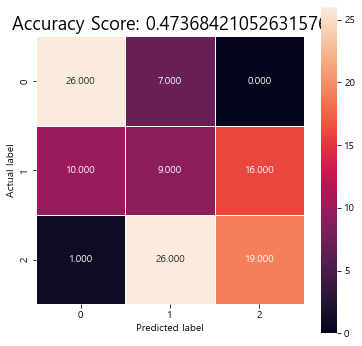

In [136]:
# confusion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn # heatmap - Accuracy Score 
import matplotlib.pyplot as plt
y_pred = lgs.predict(X=eval_input) 
acc = accuracy_score(eval_label, y_pred) 
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=eval_label, y_pred=y_pred) 
# 아래를 블럭 실행하기
# confusion matrix heatmap  
plt.figure(figsize=(6,6)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

# 1.2 TF-IDF 활용한 Logistic regression

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=0.0, analyzer='word', sublinear_tf=True, ngram_range=(1,3), max_features=5000)
X=vectorizer.fit_transform(texts)

In [144]:
train_input, eval_input, train_label, eval_label = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [145]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression(solver ='lbfgs', multi_class='multinomial')
lgs.fit(train_input, train_label)

LogisticRegression(multi_class='multinomial')

In [146]:
print("Accuracy:%f" %lgs.score(eval_input, eval_label))

Accuracy:0.271930


accuracy = 0.2719298245614035


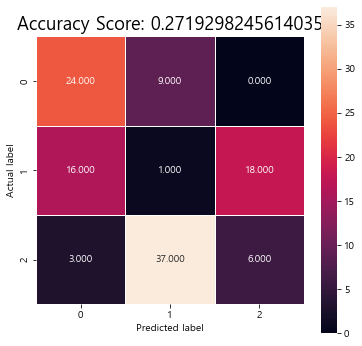

In [147]:
# confusion matrix 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn # heatmap - Accuracy Score 
import matplotlib.pyplot as plt
y_pred = lgs.predict(X=eval_input) 
acc = accuracy_score(eval_label, y_pred) 
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=eval_label, y_pred=y_pred) 
# 아래를 블럭 실행하기
# confusion matrix heatmap  
plt.figure(figsize=(6,6)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

# 1.3 BERT classification 

In [141]:
# BERT 분류모델 결과를 가져온다.

import pandas as pd
df = pd.read_csv('test_with_label.csv')
df

,label,pred
0,2,2
1,0,2
2,1,1
3,2,0
4,0,2
...,...,...
112,0,2
113,1,1
114,2,2
115,0,0


accuracy = 0.7350427350427351


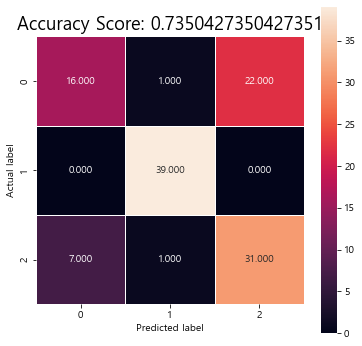

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn # heatmap - Accuracy Score 
import matplotlib.pyplot as plt


y_pred = df['pred'] 
label=df['label']
acc = accuracy_score(label, y_pred) 
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=label, y_pred=y_pred) 
# 아래를 블럭 실행하기
# confusion matrix heatmap  
plt.figure(figsize=(6,6)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 